In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy, mean_squared_error
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#libraries to help visualize data
import matplotlib.pyplot as plt

#libraries to shuffle image data
import os #used to change directories and make directories
import shutil #used to move image samples from directories
import random #used to shuffle samples

#import another python file we created

In [16]:
class_names = ["Bug", "Dark", "Dragon", "Electric", "Fairy", "Fighting", "Fire", "Flying", "Ghost", "Grass", "Ground", "Ice", "None", "Normal", "Poison", "Psychic", "Rock", "Steel", "Water"]

In [17]:
train_type1 = "CSCI4931_DLFinal-main/Dataset/type1_sorted/train"
test_type1 = "CSCI4931_DLFinal-main/Dataset/type1_sorted/test"

train_batch = ImageDataGenerator(validation_split=0.2, preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=train_type1, target_size=(64, 64), classes=class_names, batch_size=50, shuffle=True)
test_batch = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=test_type1, target_size=(64, 64), classes=class_names, batch_size=10, shuffle=False)

Found 12130 images belonging to 19 classes.
Found 1475 images belonging to 19 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

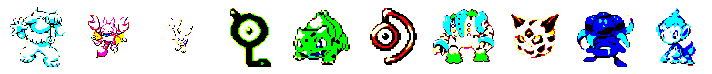

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [18]:
#visualize data (function is from tensorflow's website)
imgs, labels = next(train_batch)

def plotImages(arr):
    fig, axes = plt.subplots(1, 10, figsize=(10,20)) #will only show the first 10 images
    axes = axes.flatten()
    for img, label in zip(arr, axes): 
        label.imshow(img)
        label.axis('off')
    plt.tight_layout()
    plt.show()

plotImages(imgs)
print(labels)


In [22]:
model = Sequential([
    Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = 'same', input_shape = (64, 64, 3)),
    MaxPool2D(pool_size = (3,3), strides = 2),
    Dropout(0.25),
    Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    MaxPool2D(pool_size = (3,3), strides = 2),
    Dropout(0.25),
    Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    Conv2D(filters = 256, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    Conv2D(filters = 512, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    MaxPool2D(pool_size = (3,3), strides = 2),
    Dropout(0.25),
    Flatten(),
    Dense(units = 19, activation = 'sigmoid'),
])
#definitely need to extend, feels like data is being overfitted?

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       7

In [23]:
model.compile(optimizer = Adam(learning_rate = 0.0001), loss = "categorical_crossentropy", metrics = ["accuracy","mean_squared_error"])

In [24]:
model.fit(x=train_batch, steps_per_epoch = 50, epochs=30, verbose=1)

Epoch 1/30


C:\Users\Brady\Anaconda3\lib\site-packages\PIL\Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


50/50 [==============================] - 19s 368ms/step - loss: 25.7526 - accuracy: 0.0446 - mean_squared_error: 0.7849
Epoch 2/30
50/50 [==============================] - 21s 413ms/step - loss: 4.3481 - accuracy: 0.1625 - mean_squared_error: 0.8916
Epoch 3/30
50/50 [==============================] - 21s 422ms/step - loss: 3.2897 - accuracy: 0.1900 - mean_squared_error: 0.8578
Epoch 4/30
50/50 [==============================] - 21s 416ms/step - loss: 2.9215 - accuracy: 0.2181 - mean_squared_error: 0.7493
Epoch 5/30
50/50 [==============================] - 20s 393ms/step - loss: 2.8122 - accuracy: 0.2293 - mean_squared_error: 0.6342
Epoch 6/30
50/50 [==============================] - 19s 376ms/step - loss: 2.6202 - accuracy: 0.2874 - mean_squared_error: 0.5246
Epoch 7/30
50/50 [==============================] - 20s 393ms/step - loss: 2.6307 - accuracy: 0.2804 - mean_squared_error: 0.4547
Epoch 8/30
50/50 [==============================] - 19s 378ms/step - loss: 2.5832 - accuracy: 0.2872

In [25]:
output = model.predict(test_batch)
output

array([[0.57305795, 0.47050685, 0.4224593 , ..., 0.4710528 , 0.42240867,
        0.43848252],
       [0.5399175 , 0.43221813, 0.44902462, ..., 0.39075136, 0.49678278,
        0.42530957],
       [0.3003399 , 0.30893052, 0.40370375, ..., 0.40386364, 0.5060026 ,
        0.83558905],
       ...,
       [0.4047709 , 0.44539082, 0.4923371 , ..., 0.46886864, 0.5498853 ,
        0.7797295 ],
       [0.39657238, 0.2626557 , 0.35641474, ..., 0.3594281 , 0.27610052,
        0.6286987 ],
       [0.44253677, 0.04063404, 0.05188304, ..., 0.40812865, 0.03101784,
        0.6458842 ]], dtype=float32)

In [ ]:
prediction = []

In [ ]:
def getType(pokemon):
    return np.argmax(pokemon)

In [ ]:
for x in range(0,len(output)):
    prediction.append(getType(output[x]))

In [10]:
def test_accuracy(prediction, real):
    correct = 0
    if len(prediction) != len(real):
        print("Error")
        return 0
    for x in range(0, len(prediction)):
        if prediction[x] == real[x]:
            correct += 1
    print(100 * (correct / len(prediction)))

test_accuracy(prediction,test_batch.labels)

47.32203389830508


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

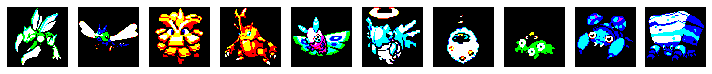

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [26]:
imgs, labels = next(test_batch)
plotImages(imgs)
print(labels)

In [12]:
test_batch.filenames

['Bug\\black-white-123.png',
 'Bug\\black-white-193.png',
 'Bug\\black-white-204.png',
 'Bug\\black-white-214.png',
 'Bug\\black-white-269.png',
 'Bug\\black-white-292.png',
 'Bug\\black-white-412-sandy.png',
 'Bug\\black-white-413.png',
 'Bug\\black-white-46.png',
 'Bug\\black-white-558.png',
 'Bug\\black-white-588.png',
 'Bug\\black-white-589.png',
 'Bug\\black-white-596.png',
 'Bug\\black-white-616.png',
 'Bug\\conquest-212.png',
 'Bug\\conquest-541.png',
 'Bug\\conquest-637.png',
 'Bug\\crystal-123.png',
 'Bug\\crystal-14.png',
 'Bug\\crystal-214.png',
 'Bug\\crystal-46.png',
 'Bug\\crystal-48.png',
 'Bug\\diamond-pearl-11.png',
 'Bug\\diamond-pearl-127.png',
 'Bug\\diamond-pearl-13.png',
 'Bug\\diamond-pearl-14.png',
 'Bug\\diamond-pearl-291.png',
 'Bug\\diamond-pearl-292.png',
 'Bug\\diamond-pearl-413-sandy.png',
 'Bug\\diamond-pearl-413-trash.png',
 'Bug\\diamond-pearl-414.png',
 'Bug\\diamond-pearl-46.png',
 'Bug\\emerald-166.png',
 'Bug\\emerald-193.png',
 'Bug\\emerald-204.pn